In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt

from utils import *
from skimage.util import random_noise

import glob
import os

### Introduction Plot and Image Table

In [2]:
def plot(x,model,noise_factor,num=16,isSave=False):
    h = w = 64
    # plot of generation
    n = np.sqrt(num).astype(np.int32)
    I_generated = np.empty((h*n, w*n,3))
    
    x_train_noisy = random_noise(x, mode='s&p', amount = noise_factor)
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x_train_noisy[i*n+j, :].reshape(64,64,3)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
#     plt.title(name)
    plt.title(model+" face with "+str(int(noise_factor*100))+"% noise")
    if isSave:
        plt.savefig("ICDM/plot/"+model+"_face_n"+str(int(noise_factor*100))+".png")
    plt.show()

In [3]:
data_files = glob.glob(os.path.join("./input_data/Face_data", "*.jpg"))
data_files = sorted(data_files)
data_files = np.array(data_files)
x_train = np.array([get_image(data_file, 148) for data_file in data_files])
# x_train_noisy = random_noise(x_train, mode='s&p', amount = noise_factor)

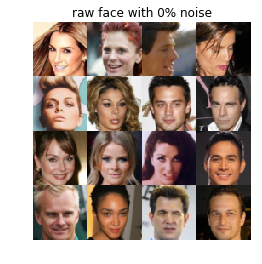

In [4]:
plot(x_train,model="raw",noise_factor=0,num = 16,isSave=True)

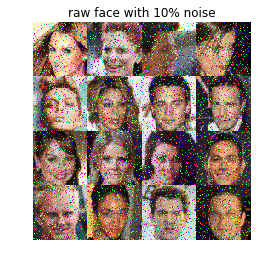

In [5]:
plot(x_train,model='raw',noise_factor=0.1,num=16,isSave=True)
# plot(x_train[9:],model="raw",noise_factor=0)

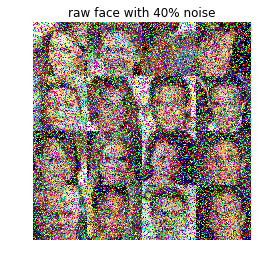

In [6]:
plot(x_train,model='raw',noise_factor=0.4,num=16,isSave=True)

In [3]:
def plot_generation(x,model,noise_factor,num=16,isSave=False):
    h = w = 64
    # plot of generation
    n = np.sqrt(num).astype(np.int32)
    I_generated = np.empty((h*n, w*n,3))
    
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x[i*n+j, :].reshape(64,64,3)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
    if isSave:
        plt.savefig("ICDM/plot/"+model+"_face_n"+noise_factor+".png")
    plt.show()

In [14]:
noise_factor = str(0.1)
face_rvae = np.load("ICDM/face/rcnnvae_face/lambda_300/noise_"+noise_factor+"/generation_fid.npy")[:200]
face_rda = np.load("ICDM/face/rdavae_face/lambda_300/noise_"+noise_factor+"/generation_fid.npy")[:200]
face_lpf = np.load("ICDM/face/lpfvae_face/"+noise_factor+"/generation_fid.npy")[:200]
face_vae = np.load("ICDM/face/cnnvae_face/"+noise_factor+"/generation_fid.npy")[:200]

face_rvae = np.transpose(face_rvae,(0,2,3,1))
face_rda = np.transpose(face_rda,(0,2,3,1))
face_lpf = np.transpose(face_lpf,(0,2,3,1))
face_vae = np.transpose(face_vae,(0,2,3,1))

print(face_rvae.shape)
print(face_rda.shape)
print(face_lpf.shape)
print(face_vae.shape)

(200, 64, 64, 3)
(200, 64, 64, 3)
(200, 64, 64, 3)
(200, 64, 64, 3)


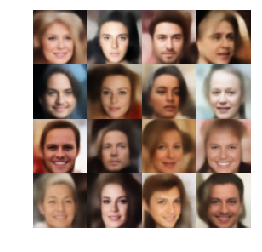

In [15]:
plot_generation(face_rvae[70:],model='rvae',noise_factor='10',num=16,isSave=True)

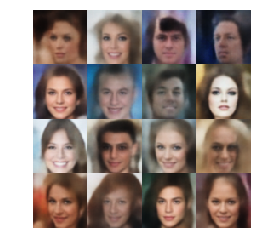

In [16]:
plot_generation(face_vae[0:],model='vae',noise_factor='10',num=16,isSave=True)

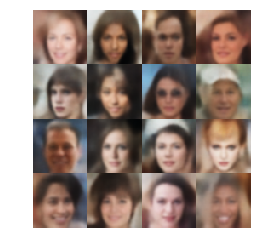

In [17]:
plot_generation(face_lpf[10:],model='lpf',noise_factor='10',num=16,isSave=True)

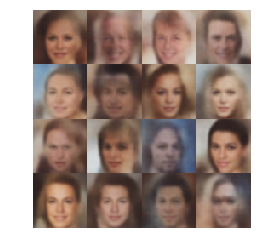

In [9]:
# rpca
gene4 = np.load("ICDM/face/rpca_face/0.4/generation_fid.npy")
gene4 = np.transpose(gene4[100:],(0,2,3,1))
plot_generation(gene4,'rpca','40',num=16,isSave=True)

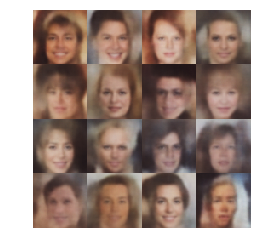

In [7]:
# rpca
gene1 = np.load("ICDM/face/rpca_face/0.1/generation_fid.npy")
gene1 = np.transpose(gene1,(0,2,3,1))
plot_generation(gene1,'rpca','10',num=16,isSave=True)

* GAN Image Table

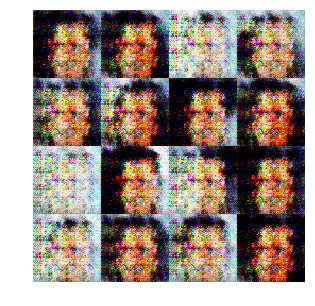

In [5]:
dcgan1 = np.load("result/color0.1/199.npy")
dcgan1 = np.transpose(dcgan1,(0,2,3,1))
plot_generation(dcgan1,model='dcgan',noise_factor='10',num=16,isSave=True)

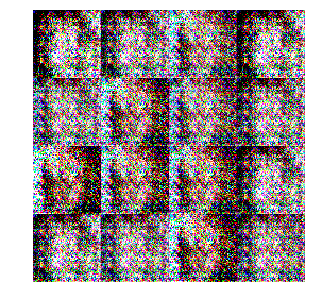

In [6]:
dcgan4 = np.load("result/color0.4/199.npy")
dcgan4 = np.transpose(dcgan4,(0,2,3,1))
plot_generation(dcgan4,model='dcgan',noise_factor='40',num=16,isSave=True)

In [18]:
def plot_gray(x,model,noise_factor,num=16,isSave=False):
    h = w = 28
    # plot of generation
    n = np.sqrt(num).astype(np.int32)
    I_generated = np.empty((h*n, w*n))
    
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x[i*n+j, :].reshape(28,28)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
    if isSave:
        plt.savefig("ICDM/plot/"+model+"_n"+noise_factor+".png")
    plt.show()

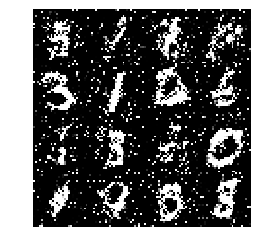

In [19]:
mnist05 = np.load("result/MNIST0.05/199.npy")
plot_gray(mnist05,'gan_mnist',noise_factor='05',num=16,isSave=True)

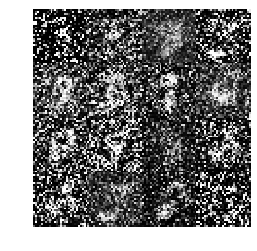

In [20]:
mnist29 = np.load("result/MNIST0.29/199.npy")
plot_gray(mnist29,'gan_mnist',noise_factor='29',num=16,isSave=True)

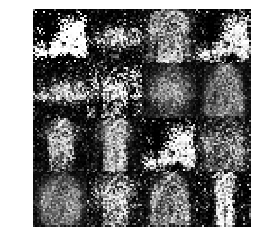

In [21]:
fashion09 = np.load("result/Fashion0.09/199.npy")
plot_gray(fashion09[5:],'gan_fashion',noise_factor='09',num=16,isSave=True)

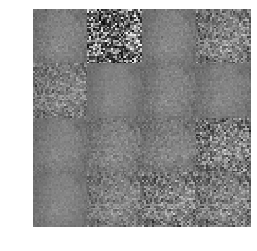

In [22]:
fashion41 = np.load("result/Fashion0.41/199.npy")
plot_gray(fashion41,'gan_fashion',noise_factor='41',num=16,isSave=True)

### HeatMap from KDD

In [44]:
rpca_fid_scores = np.load("ICDM/kdd/mnist_sp/fid_scores_rpca.npy")
vae_fid_scores = np.load("ICDM/kdd/mnist_sp/fid_scores_vae.npy")
rvae_fid_scores = np.load("ICDM/kdd/mnist_sp/fid_scores_rvae.npy")

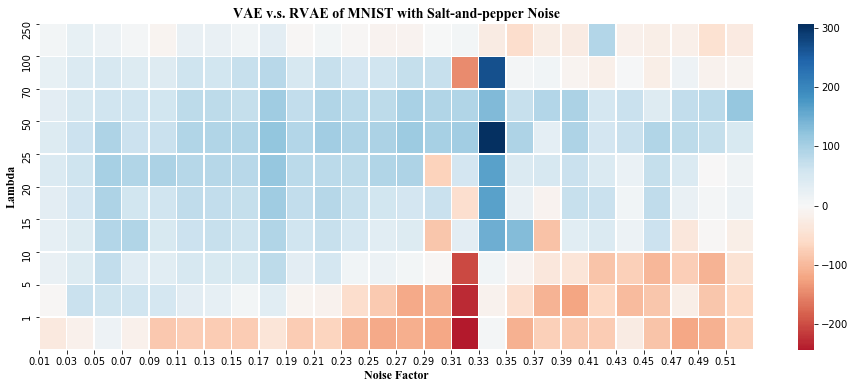

In [41]:
lambdas = [1,5,10,15,20,25,50,70,100,250]
noise_factors = [round(0.01*i,2) for i in range(1,52,2)]

csfont = {'fontname':'Times New Roman'}

plt.figure(figsize=(16, 6))
ax = sns.heatmap((vae_fid_scores - rvae_fid_scores)[::-1], linewidth=0.5,cmap="RdBu",center=0) #bwr

plt.xlabel("Noise Factor",size=12,**csfont)
plt.ylabel("Lambda",size=12,**csfont)
plt.yticks(range(len(lambdas)),lambdas[::-1])
plt.xticks(range(len(noise_factors)),noise_factors)
# plt.xticks(rotation=45)
plt.title("VAE v.s. RVAE of MNIST with Salt-and-pepper Noise",size=14,**csfont)

# plt.savefig("../sp_pic/fid_heatmap_mnist.png")
plt.show()

### MNIST Gaussian Plot

In [21]:
vae_fid_gs = np.load("ICDM/kdd/mnist_gs/fid_scores_vae.npy")
rvae_fid_gs = np.load("ICDM/kdd/mnist_gs/fid_scores_rvae.npy")

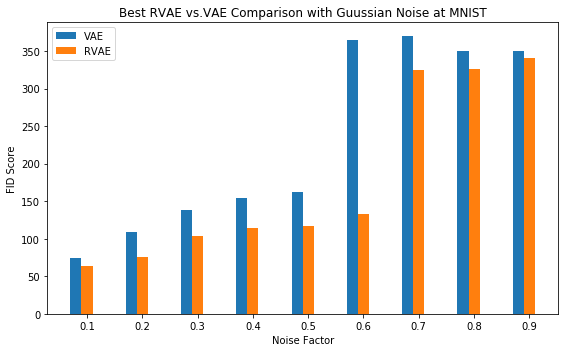

In [22]:
noise_factors = [round(0.1*i,1) for i in range(1,10)]
# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(len(noise_factors))
bar_width = 0.2
opacity = 1
 
rects2 = plt.bar(index , vae_fid_gs, bar_width,
                 alpha=opacity, label='VAE')

rects1 = plt.bar(index+ bar_width, rvae_fid_gs.min(axis=0), bar_width,
                 alpha=opacity, label='RVAE') # best RVAE
 
plt.xlabel('Noise Factor')
plt.ylabel('FID Score')
plt.title('Best RVAE vs.VAE Comparison with Guussian Noise at MNIST')
plt.xticks(index + bar_width, noise_factors)
plt.legend()
 
plt.tight_layout()
# plt.savefig("../gs_pic/gs_vae_rvae_bar.png")
plt.show()


### RDA+VAE vs. RVAE

#### MNIST Comparison

In [3]:
rvae_fid_mnist = np.load("ICDM/mnist/old25/fid_scores_rvae_relu.npy")
rda_fid_mnist = np.load("ICDM/mnist/old25/fid_scores_rda_sig.npy")
rdahalf_fid_mnist = np.load("ICDM/mnist/fid_scores_rdahalf_25.npy")

In [9]:
rdahalf_fid_mnist[rdahalf_fid_mnist==500]=300

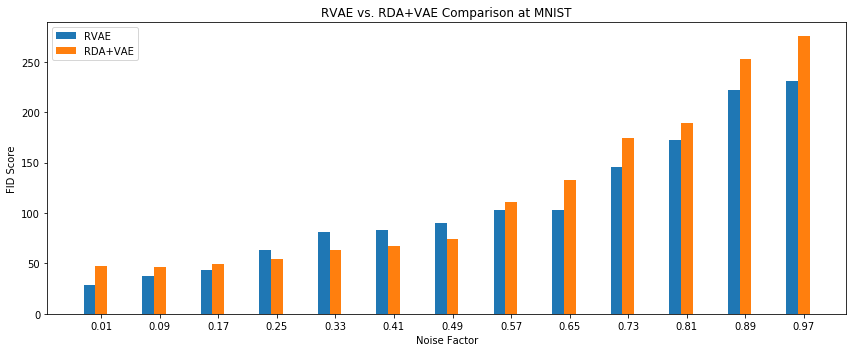

In [6]:
noise_factors = [round(0.01*i,2) for i in range(1,100,8)]
# create plot
fig, ax = plt.subplots(figsize=(12,5))
index = np.arange(len(noise_factors))
bar_width = 0.2
opacity = 1
 
plt.bar(index, rvae_fid_mnist[:,::2].min(axis=0), bar_width, alpha=opacity, label='RVAE') 
plt.bar(index + bar_width, rda_fid_mnist[:,::2].min(axis=0), bar_width, alpha=opacity, label='RDA+VAE')
# plt.bar(index + bar_width, rdahalf_fid_mnist[:,::2].min(axis=0), bar_width, alpha=opacity, label='RDA_half+VAE')
plt.xlabel('Noise Factor')
plt.ylabel('FID Score')
plt.title('RVAE vs. RDA+VAE Comparison at MNIST')
plt.xticks(index + bar_width, noise_factors)
plt.legend()
 
plt.tight_layout()
# plt.savefig("../gs_pic/gs_vae_rvae_bar.png")
plt.show()


In [7]:
lambdas = [1,5,10,15,20,25,50,70,100,250]
noise_factors = [round(0.1*i,1) for i in range(1,10)]
running_time_rda_mnist = []
running_time_rvae_mnist = []

for l in lambdas:
    tmp = []
    tmp2 = []
    for n in noise_factors:
        tmp.append(np.load("ICDM/face/rcnnvae_face/lambda_"+str(l)+"/noise_"+str(n)+"/running_time.npy").item())
        tmp2.append(np.load("ICDM/face/rdavae_face/lambda_"+str(l)+"/noise_"+str(n)+"/running_time.npy").item())
    running_time_rda_mnist.append(tmp)
    running_time_rvae_mnist.append(tmp2)

running_time_rda_mnist = np.array(running_time_rda_mnist)
running_time_rvae_mnist = np.array(running_time_rvae_mnist)

In [ ]:
noise_factors = [round(0.1*i,1) for i in range(1,10)]
# create plot
fig, ax = plt.subplots(figsize=(12,5))
index = np.arange(len(noise_factors))
bar_width = 0.2
opacity = 1
 
plt.bar(index, running_time_rvae_mnist.T.mean(axis=1), bar_width,
                 alpha=opacity, label='RVAE')
 
plt.bar(index + bar_width, running_time_rda_mnist.T.mean(axis=1), bar_width,
                 alpha=opacity, label='RDA+VAE')

 
plt.xlabel('Noise Factor')
plt.ylabel('Time')
plt.title('RVAE vs. RDA+VAE Comparison Running Efficiency')
plt.xticks(index + bar_width, noise_factors)
plt.legend()
 
plt.tight_layout()
# plt.savefig("../gs_pic/gs_vae_rvae_bar.png")
plt.show()


#### Face Comparison

In [47]:
vae_fid_face = np.load("ICDM/face/fid_scores_facevae.npy")
rvae_fid_face = np.load("ICDM/face/fid_scores_facervae.npy")
rda_fid_face = np.load("ICDM/face/fid_scores_facerda.npy")
rdahalf_fid_face = np.load("ICDM/face/fid_scores_facerdahalf.npy")
rvaehalf_fid_face = np.load("ICDM/face/fid_scores_facervaehalf.npy")


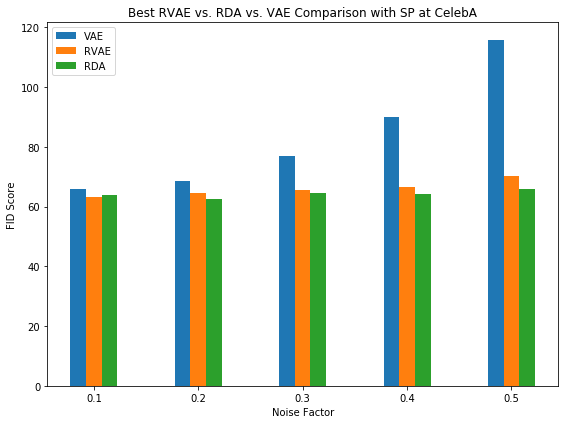

In [25]:
noise_factors = [round(0.1*i,1) for i in range(1,6)]
# create plot
fig, ax = plt.subplots(figsize=(8,6))
index = np.arange(len(noise_factors))
bar_width = 0.15
opacity = 1

plt.bar(index  , vae_fid_face, bar_width, alpha=opacity, label='VAE')

plt.bar(index + bar_width, rvae_fid_face.min(axis=0), bar_width, alpha=opacity, label='RVAE') # best RVAE
 
plt.bar(index + 2*bar_width, rda_fid_face.min(axis=0), bar_width, alpha=opacity, label='RDA') # best RVAE

plt.bar(index + 3*bar_width, rdahalf_fid_face.min(axis=0), bar_width, alpha=opacity, label='RDA_half') # best RVAE

 
plt.xlabel('Noise Factor')
plt.ylabel('FID Score')
plt.title('Best RVAE vs. RDA vs. VAE Comparison with SP at CelebA')
plt.xticks(index + bar_width, noise_factors)
plt.legend()
 
plt.tight_layout()
# plt.savefig("../gs_pic/gs_vae_rvae_bar.png")
plt.show()


In [2]:
lambdas = [100,300,500]
noise_factors = [round(0.1*i,1) for i in range(1,6)]
running_time_rda = []
running_time_rvae = []

for l in lambdas:
    tmp = []
    tmp2 = []
    for n in noise_factors:
        tmp.append(np.load("ICDM/face/rcnnvae_face/lambda_"+str(l)+"/noise_"+str(n)+"/running_time.npy").item())
        tmp2.append(np.load("ICDM/face/rdavae_face/lambda_"+str(l)+"/noise_"+str(n)+"/running_time.npy").item())
    running_time_rvae.append(tmp)
    running_time_rda.append(tmp2)

running_time_rda = np.array(running_time_rda)
running_time_rvae = np.array(running_time_rvae)

In [107]:
best_rda_time = []
best_rvae_time = []
for i in range(len(noise_factors)):
    best_rda_time.append(running_time_rda.T[i][rvae_fid_face.argmin(axis=0)[i]])
    best_rvae_time.append(running_time_rvae.T[i][rda_fid_face.argmin(axis=0)[i]])

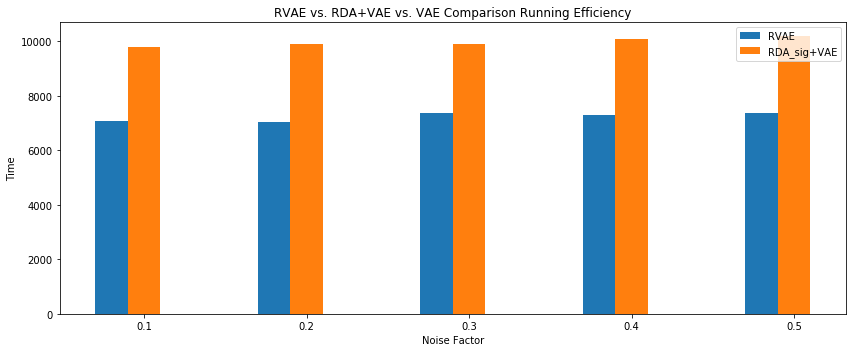

In [108]:
noise_factors = [round(0.1*i,1) for i in range(1,6)]
# create plot
fig, ax = plt.subplots(figsize=(12,5))
index = np.arange(len(noise_factors))
bar_width = 0.2
opacity = 1
 
rects1 = plt.bar(index, best_rvae_time, bar_width,
                 alpha=opacity, label='RVAE')
 
rects2 = plt.bar(index + bar_width, best_rda_time, bar_width,
                 alpha=opacity, label='RDA_sig+VAE')

 
plt.xlabel('Noise Factor')
plt.ylabel('Time')
plt.title('RVAE vs. RDA+VAE vs. VAE Comparison Running Efficiency')
plt.xticks(index + bar_width, noise_factors)
plt.legend()
 
plt.tight_layout()
# plt.savefig("../gs_pic/gs_vae_rvae_bar.png")
plt.show()
